In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

In [2]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[2]).c_if(creg_c, 0)
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1]).c_if(creg_c, 0)
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[0]).c_if(creg_c, 0)
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.x(qreg_q[2]).c_if(creg_c, 0)
circuit.measure(qreg_q[2], creg_c[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[2]).c_if(creg_c, 7)
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1]).c_if(creg_c, 7)
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[0]).c_if(creg_c, 7)
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.x(qreg_q[2]).c_if(creg_c, 7)
circuit.x(qreg_q[2]).c_if(creg_c, 0)
circuit.measure(qreg_q[2], creg_c[2])

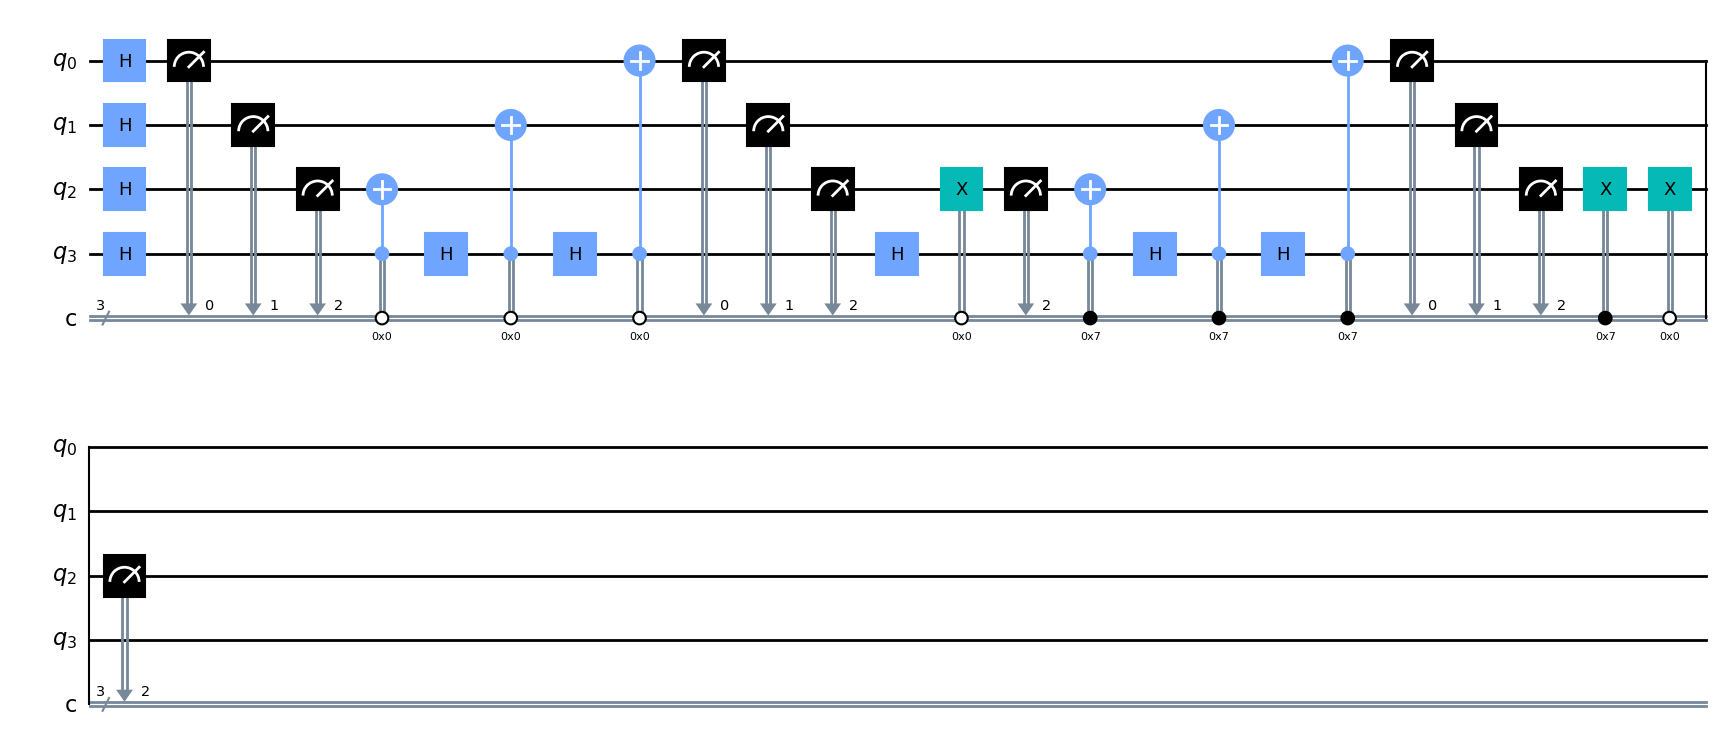

In [4]:
circuit.draw('mpl')

In [10]:
simulator = Aer.get_backend('qasm_simulator')

results_array = {2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

for i in range(10000):
    job = execute(circuit, simulator, shots=1)
    job2 = execute(circuit, simulator, shots=1)
    result = job.result().get_counts().most_frequent()
    result2 = job2.result().get_counts().most_frequent()

    result = int(result,2) + int(result2,2)
    results_array[result] = results_array[result] + 1


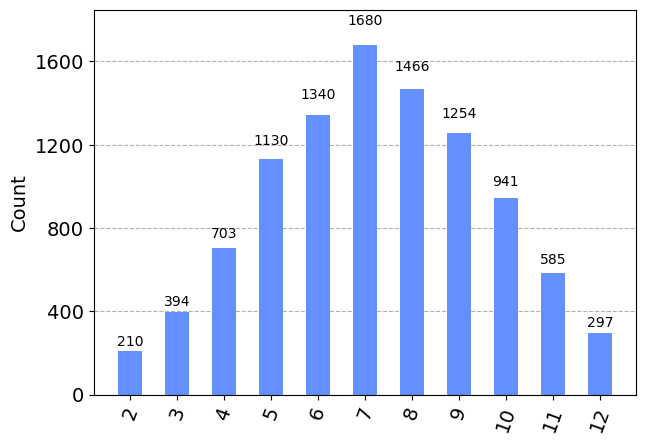

In [11]:
plot_histogram(results_array)